### DATA ANALYSIS VISUALIZATION OF THE MOVIES DATASET

In [1]:
import pandas as pd
movies = pd.read_csv('movies_data')

In [2]:
movies.head()

,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,budget,imdb_id,genre_bis,profit
0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,245000000,tt2488496,Action,691662225
1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,237000000,tt0499549,Action,523507625
2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,200000000,tt0120338,Romance,459325379
3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,150000000,tt0369610,Action,502270625
4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,220000000,tt0848228,Action,403279547


Having read the cleaned csv file for our movies data, the next step is to start the data analysis,exploration and visualization

To calculate the movies summary statistics

In [3]:
movies.describe()

,all_years,all_scores,all_meta,all_votes,all_gross,budget,profit
count,4745.000000,4745.000000,4745.000000,4.745000e+03,4.745000e+03,4.745000e+03,4.745000e+03
mean,1997.440674,64.110011,45.725395,1.113167e+05,5.492750e+07,3.250036e+07,2.242715e+07
std,14.219725,9.699865,25.722499,1.769997e+05,6.538154e+07,4.274091e+07,5.090711e+07
min,1915.000000,19.000000,0.000000,1.470000e+02,9.074550e+06,0.000000e+00,-1.869219e+08
25%,1989.000000,58.000000,32.000000,1.651000e+04,1.748856e+07,1.300000e+05,5.736410e+05
50%,2000.000000,64.000000,49.000000,4.946300e+04,3.268234e+07,1.850000e+07,1.507394e+07
75%,2008.000000,71.000000,64.000000,1.261740e+05,6.437809e+07,4.500000e+07,3.354509e+07
max,2019.000000,93.000000,100.000000,2.157599e+06,9.366622e+08,3.800000e+08,6.916622e+08


In [4]:
movies.info()# 4745 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4745 entries, 0 to 4744
Data columns (total 12 columns):
all_titles    4745 non-null object
all_years     4745 non-null int64
all_scores    4745 non-null int64
all_meta      4745 non-null int64
all_votes     4745 non-null int64
all_gross     4745 non-null int64
all_genres    4745 non-null object
id            4745 non-null object
budget        4745 non-null int64
imdb_id       4745 non-null object
genre_bis     4745 non-null object
profit        4745 non-null int64
dtypes: int64(7), object(5)
memory usage: 444.9+ KB


Dropping the rows with zeros in movie budgets to visualize the total budgets for all movies in different movies in each year

In [5]:
data_for_budget = movies[movies['budget'] > 0]

### The first visualization and analysis is to group the movies by year and check the total budget and total profit for the movies in each year 

In [8]:
data_for_budget_years = data_for_budget.groupby( ["all_years"] )['budget'].sum()

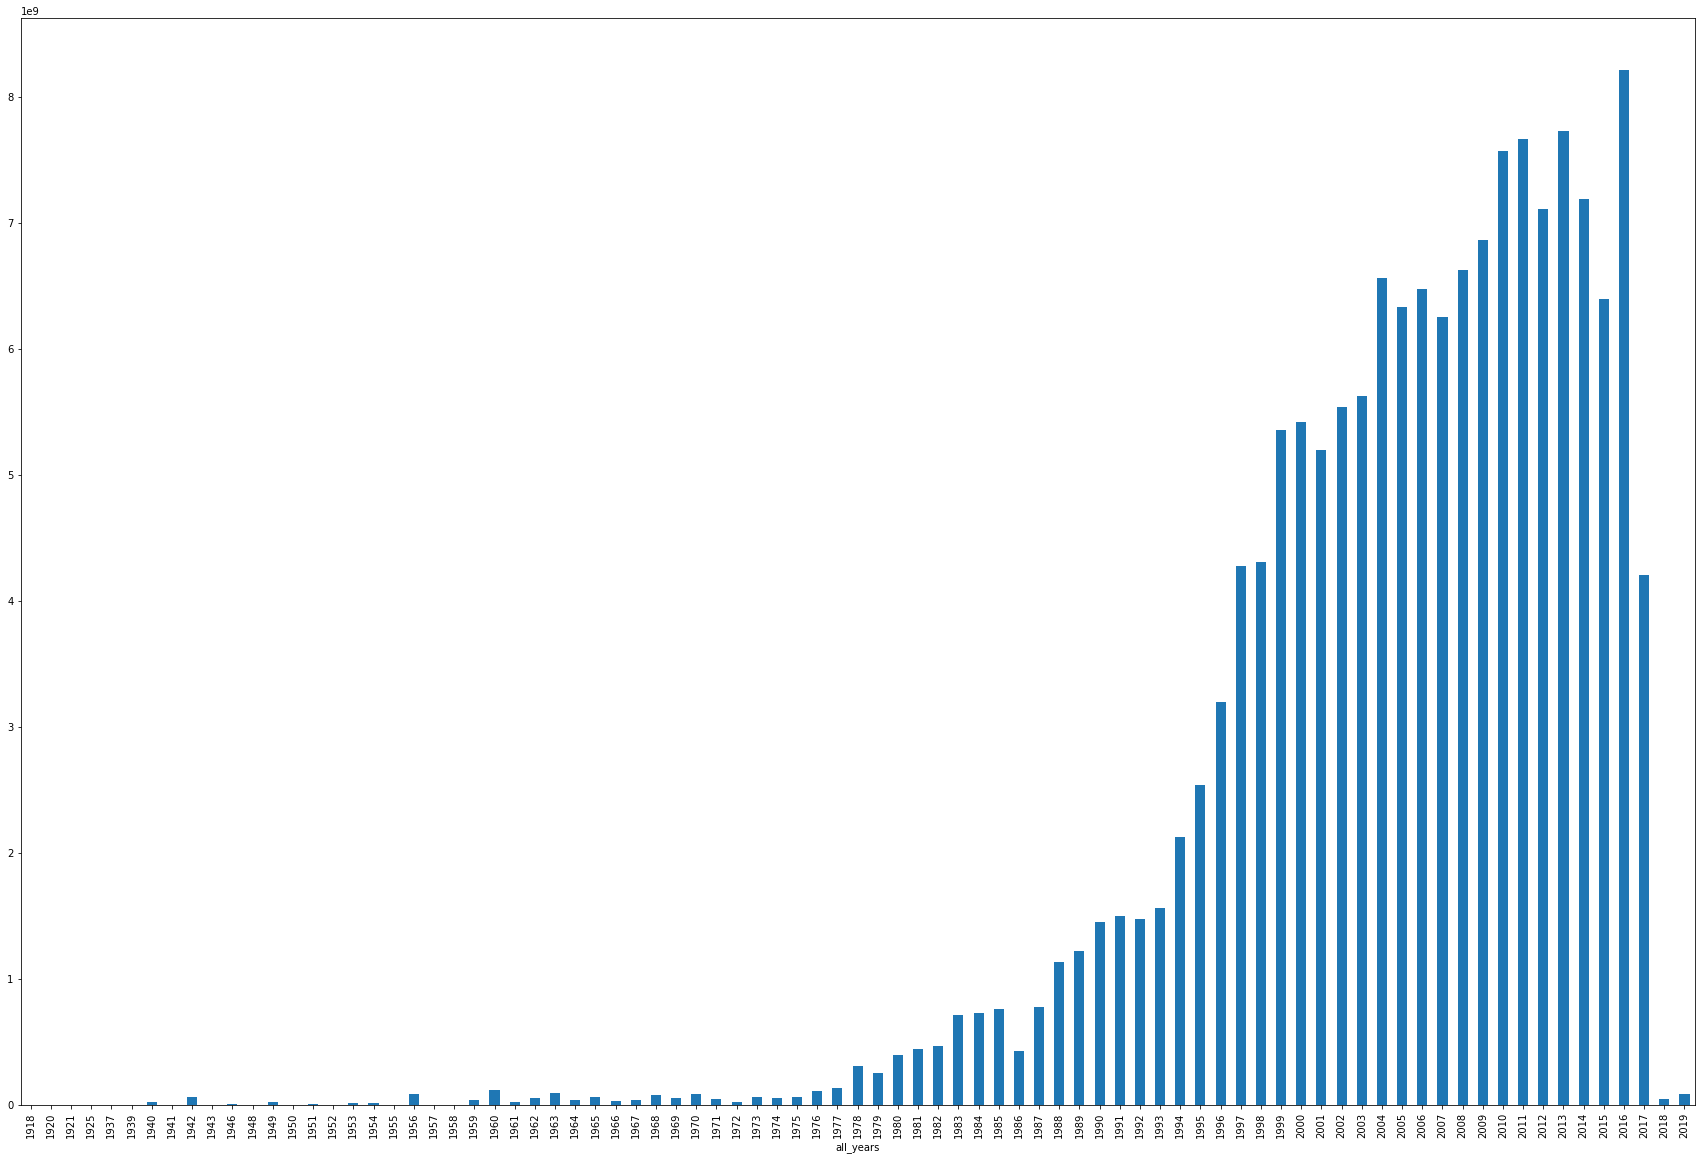

In [9]:

import matplotlib.pyplot as plt
plt.figure(figsize = (30,20))

data_for_budget_years.plot.bar()
plt.show()

In [10]:
data_for_budget_years_profit = data_for_budget.groupby( ["all_years"] )['profit'].sum()

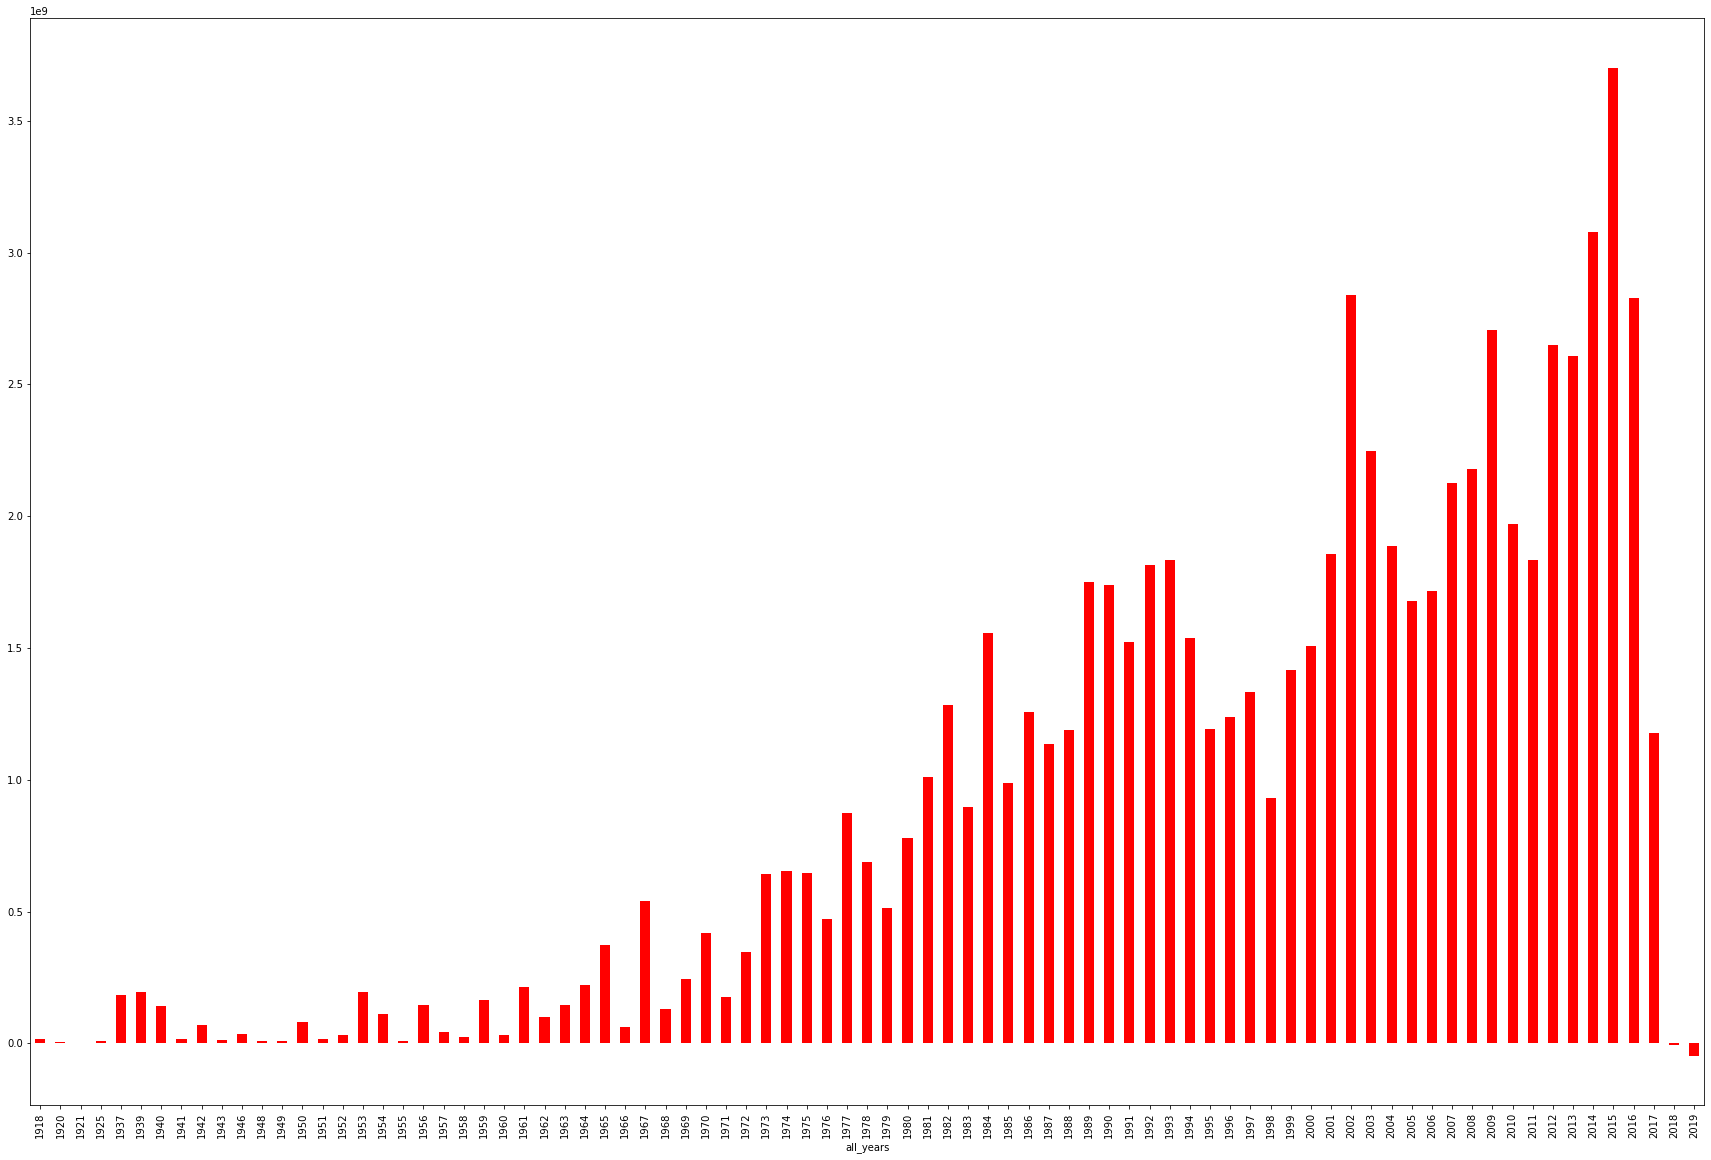

In [12]:
plt.figure(figsize = (30,20))

data_for_budget_years_profit.plot.bar( color = 'red')
plt.show()

There is no rock - steady relationship bewteeen the years and the profit or the budget of the movies. Inflation might also be a factor for movie made back in 1920 compared to movies made in 2018

### The next exploration is checking what genre gets the better ratings: Action or Romance

IMDb indicates that submitted ratings are filtered and weighted in various ways in order to produce a weighted mean that is displayed for each film, series, and so on. It states that filters are used to avoid ballot stuffing; the method is not described in detail to avoid attempts to circumvent.

In [13]:
action_dataframe = movies[movies['genre_bis'] == 'Action']

In [14]:
romance_dataframe = movies[movies['genre_bis'] == 'Romance']

##### Plotting the distribution for the action imdb ratings

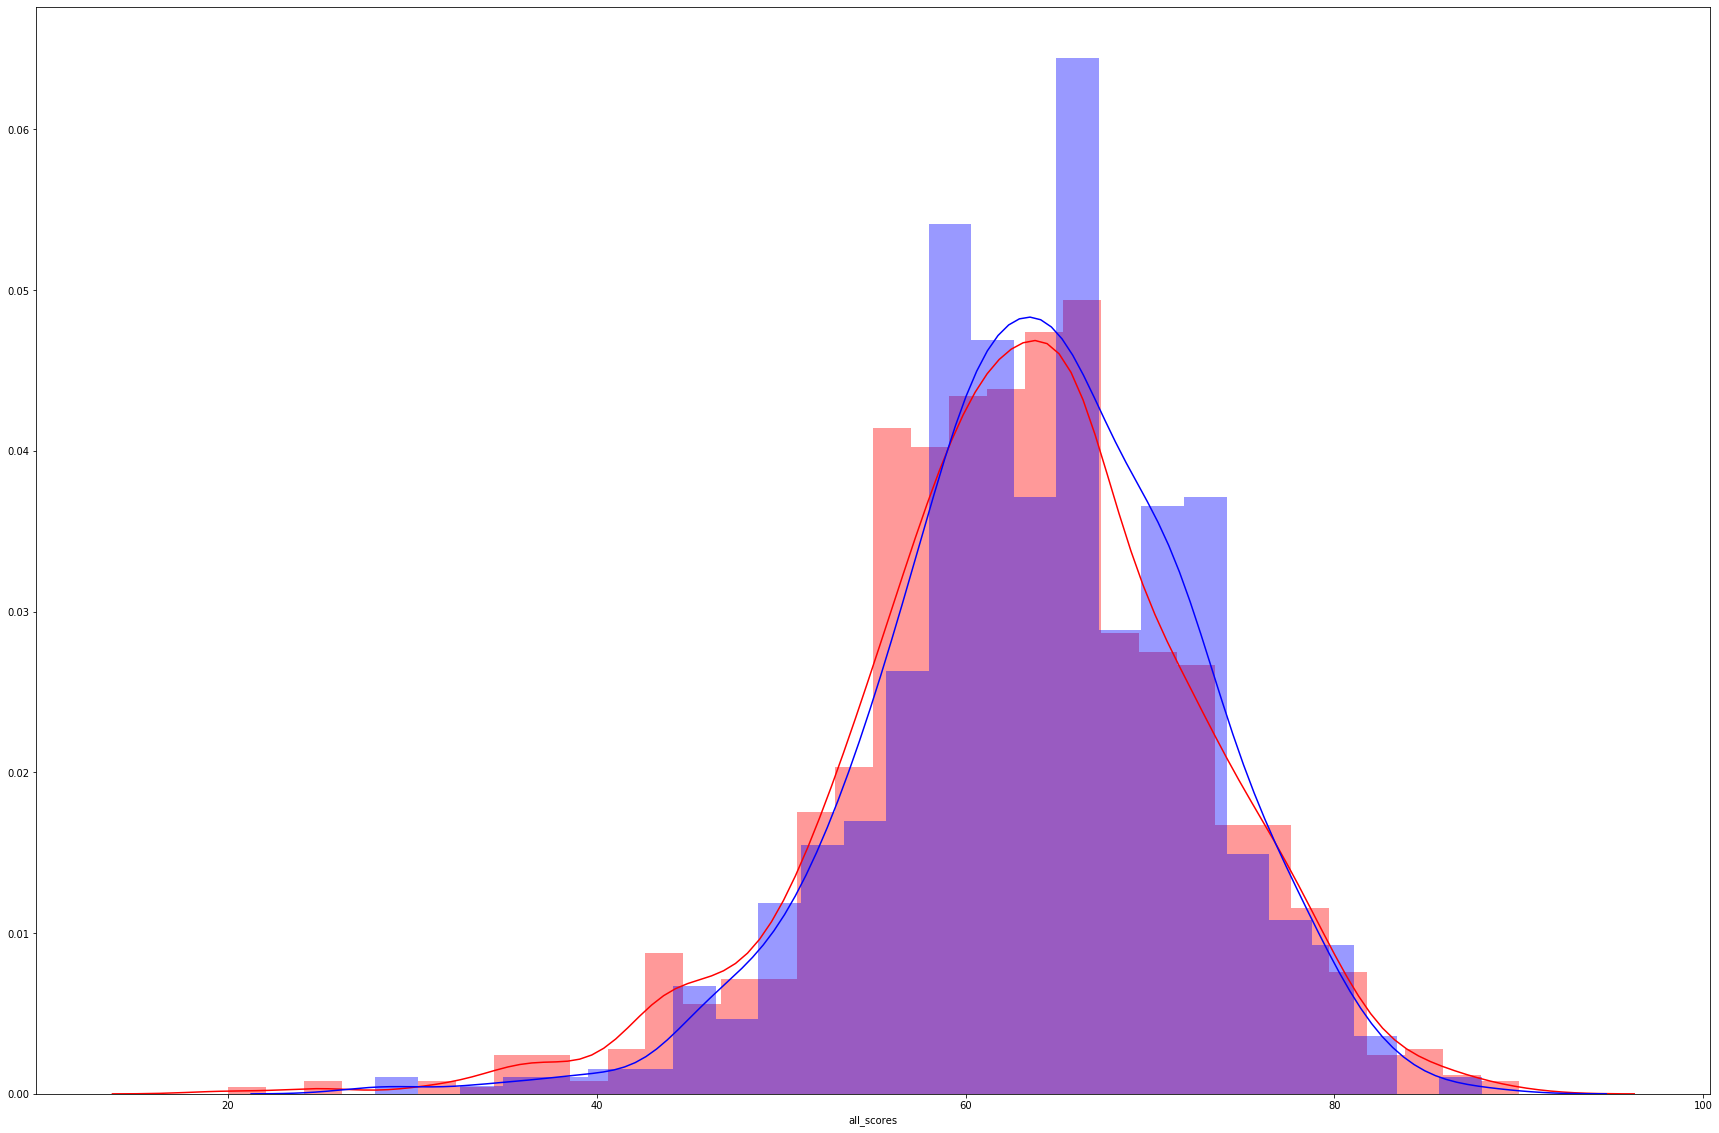

In [15]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.distplot(action_dataframe.all_scores, color ='red')
sns.distplot(romance_dataframe.all_scores , color = 'blue')

In [67]:
action_dataframe.all_scores.mean()

62.941755537325676

In [68]:
romance_dataframe.all_scores.mean()

63.769322235434004

##### Judging from the plot above the distributions are quite similar and the that also is further proven by the mean of both distributions

### THE NEXT VISUALIZATION IS DONE FOR BUDGET, GROSS AND PROFIT ADJUSTED FOR INFLATION

In [16]:
inflation_df = pd.read_csv('data_adjusted_to_inflation.csv')

In [17]:
inflation_df

,Unnamed: 0,all_titles,all_years,all_scores,all_meta,all_votes,all_gross,all_genres,id,decade,budget,imdb_id,genre_bis,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
0,0,Star Wars: Episode VII - The Force Awakens,2015,79,81,799424,936662225,"Action, Adventure, Sci-Fi",tt2488496,10s,245000000,tt2488496,Action,691662225,237.000000,1.033755e+08,3.952161e+08,2.918406e+08
1,1,Avatar,2009,78,83,1065708,760507625,"Action, Adventure, Fantasy",tt0499549,00s,237000000,tt0499549,Action,523507625,214.537000,1.104705e+08,3.544879e+08,2.440174e+08
2,2,Titanic,1997,78,75,979853,659325379,"Drama, Romance",tt0120338,90s,200000000,tt0120338,Romance,459325379,160.516667,1.245977e+08,4.107520e+08,2.861543e+08
3,3,Jurassic World,2015,70,59,549843,652270625,"Action, Adventure, Sci-Fi",tt0369610,10s,150000000,tt0369610,Action,502270625,237.000000,6.329114e+07,2.752197e+08,2.119285e+08
4,4,Avengers Assemble,2012,80,69,1206183,623279547,"Action, Adventure, Sci-Fi",tt0848228,10s,220000000,tt0848228,Action,403279547,229.593917,9.582135e+07,2.714704e+08,1.756491e+08
5,5,The Dark Knight,2008,90,84,2132130,534858444,"Action, Crime, Drama",tt0468569,00s,185000000,tt0468569,Action,349858444,215.302500,8.592562e+07,2.484218e+08,1.624962e+08
6,6,Rogue One,2016,78,65,493737,532177324,"Action, Adventure, Sci-Fi",tt3748528,10s,200000000,tt3748528,Action,332177324,240.000000,8.333333e+07,2.217406e+08,1.384072e+08
7,7,Beauty and the Beast,2017,72,65,247977,504014165,"Family, Fantasy, Musical",tt2771200,10s,160000000,tt2771200,no,344014165,245.000000,6.530612e+07,2.057201e+08,1.404139e+08
8,8,Finding Dory,2016,73,77,220167,486295561,"Animation, Adventure, Comedy",tt2277860,10s,200000000,tt2277860,no,286295561,240.000000,8.333333e+07,2.026232e+08,1.192898e+08
9,9,Star Wars: Episode I - The Phantom Menace,1999,65,51,668358,474544677,"Action, Adventure, Fantasy",tt0120915,90s,115000000,tt0120915,Action,359544677,166.575000,6.903797e+07,2.848835e+08,2.158455e+08


In [22]:
inflation_df= inflation_df[inflation_df['budget'] > 0]

In [32]:
inflation_df_adjusted_budget = inflation_df.groupby( ["all_years"] )['budget_adjusted'].sum()

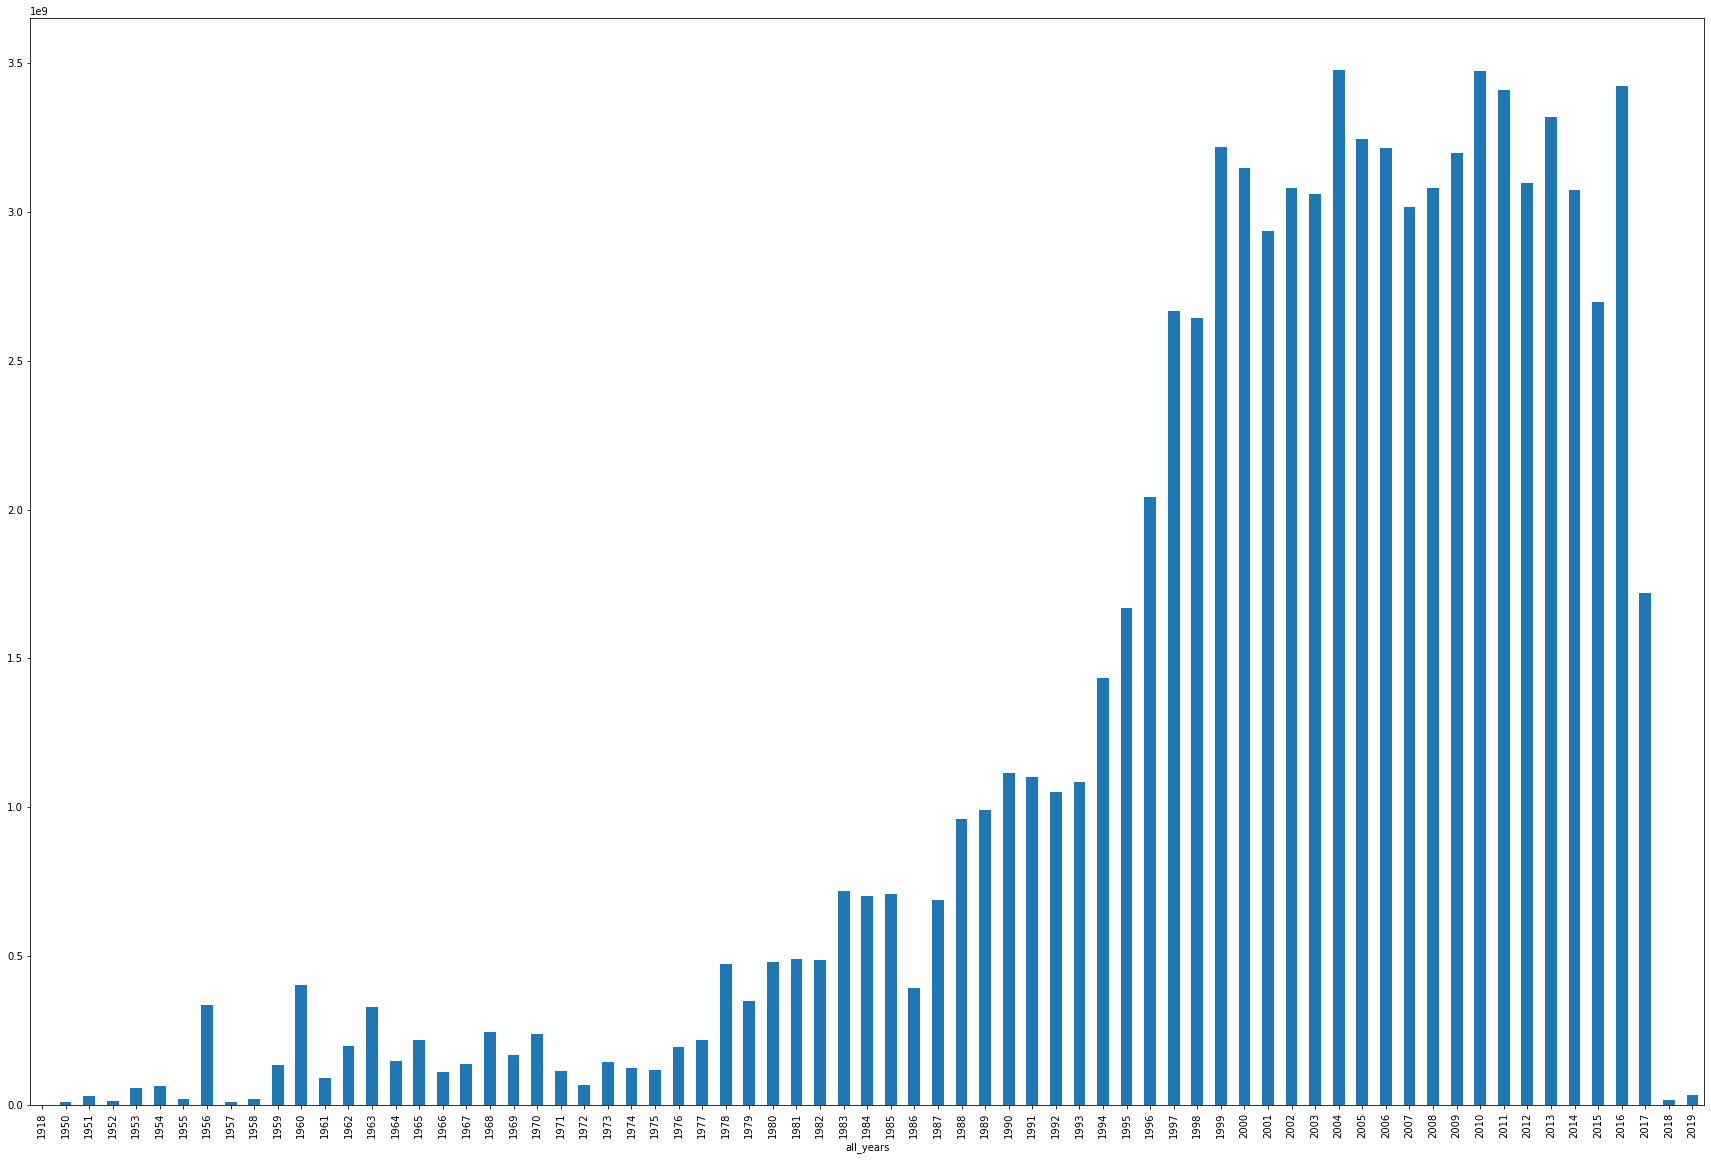

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,20))

inflation_df_adjusted_budget.plot.bar()
plt.show()

In [34]:
inflation_df_adjusted_profit = inflation_df.groupby( ["all_years"] )['profit_adjusted'].sum()

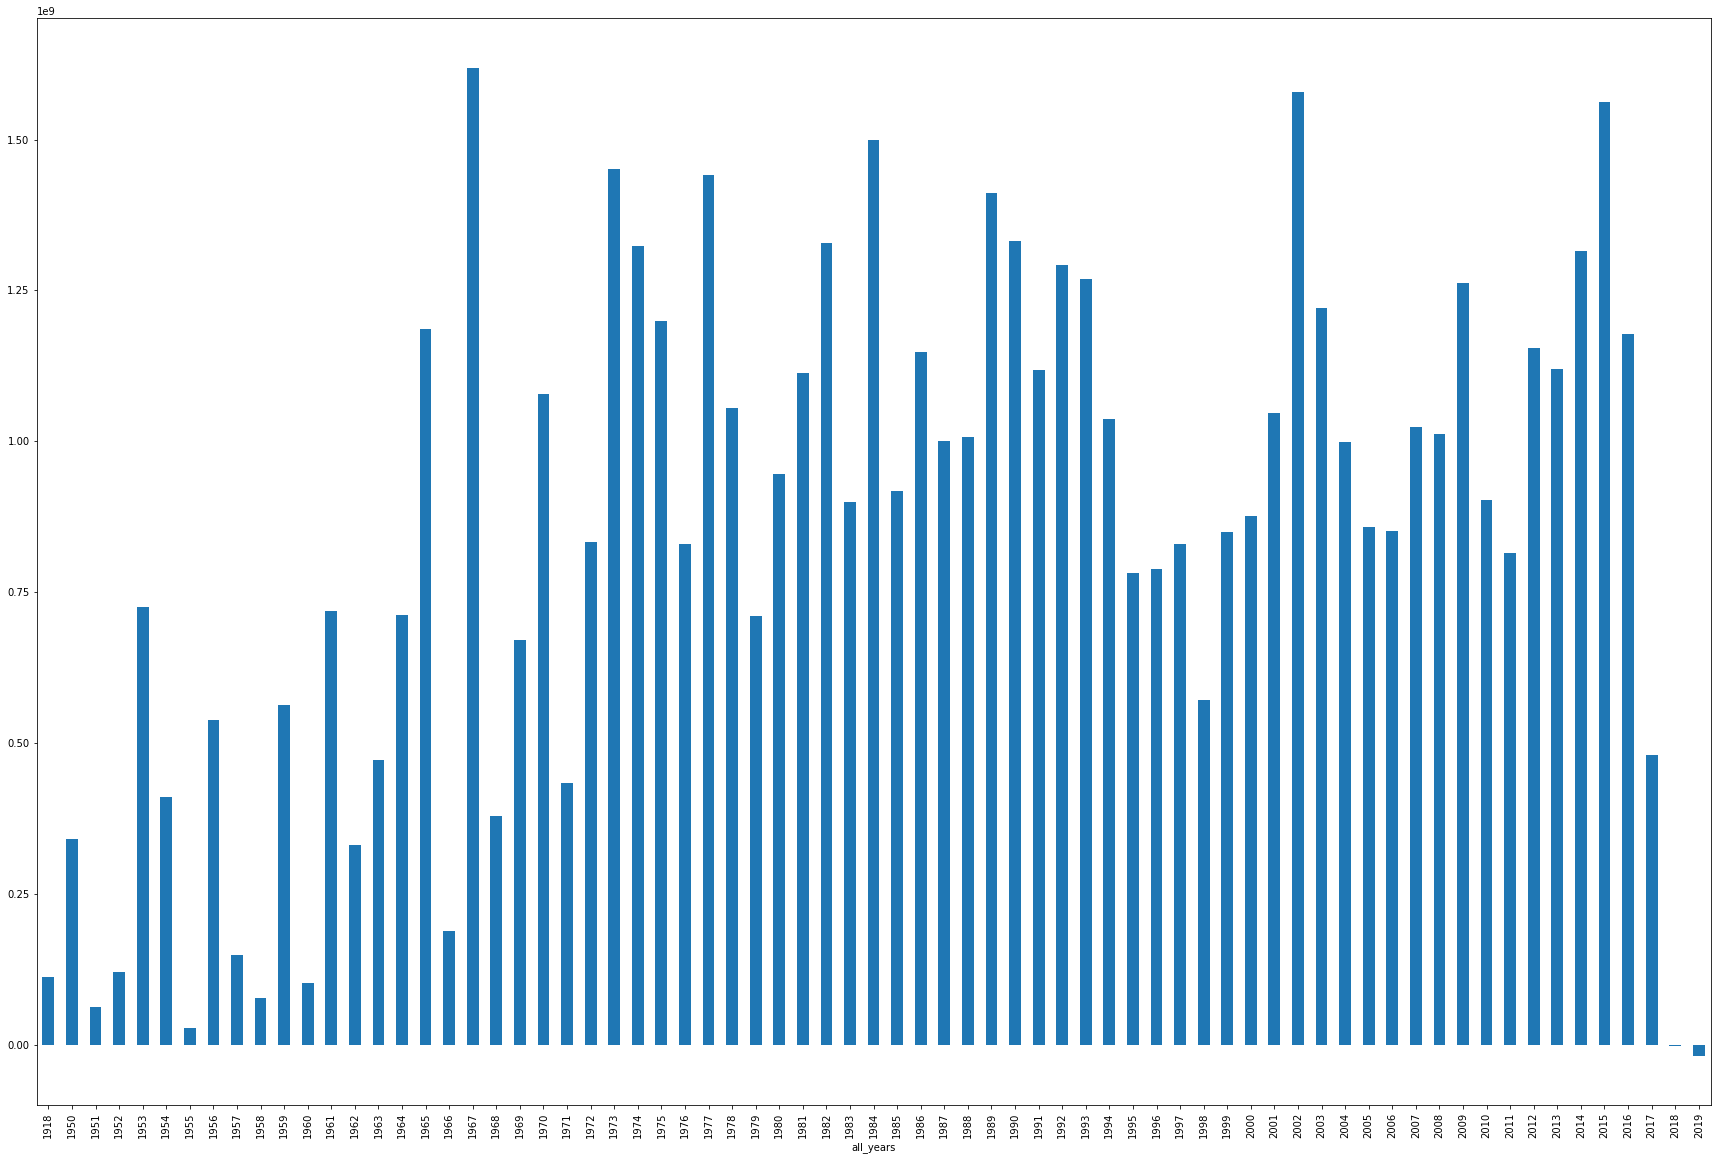

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize = (30,20))

inflation_df_adjusted_profit.plot.bar()
plt.show()

There is a stark contrast bewteen the plot when the values are adjusted for inflation and when it is not. The earlier years in the 90s to mid-90s made good profit on the movies compared to when the values were not adjusted for inflation

#### DISTRIBUTIONS OF ACTION AND ROMANCE GENRE FOR INFLATED VALUES

In [38]:
action_dataframe_2 = inflation_df[inflation_df['genre_bis'] == 'Action']

In [48]:
action_dataframe_2.describe()

,Unnamed: 0,all_years,all_scores,all_meta,all_votes,all_gross,budget,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
count,1057.000000,1057.000000,1057.000000,1057.000000,1.057000e+03,1.057000e+03,1.057000e+03,1.057000e+03,1057.000000,1.057000e+03,1.057000e+03,1.057000e+03
mean,1806.943236,2001.653737,63.337748,46.429518,1.749349e+05,8.217776e+07,6.536649e+07,1.681127e+07,180.822185,3.407420e+07,4.774197e+07,1.366777e+07
std,1320.502502,11.690260,9.471669,20.954519,2.123241e+05,9.230065e+07,5.661316e+07,7.218776e+07,51.301879,2.544324e+07,5.183631e+07,4.655240e+07
min,0.000000,1954.000000,20.000000,0.000000,1.195000e+03,9.094451e+06,5.000000e+00,-1.869219e+08,26.850000,5.249918e+00,4.130694e+06,-8.141413e+07
25%,635.000000,1995.000000,58.000000,35.000000,4.634500e+04,2.547736e+07,2.500000e+07,-1.736006e+07,152.383333,1.482397e+07,1.473047e+07,-8.813045e+06
50%,1618.000000,2004.000000,64.000000,48.000000,1.046380e+05,4.860807e+07,5.000000e+07,5.473600e+06,188.883333,2.765095e+07,3.075420e+07,3.026437e+06
75%,2836.000000,2011.000000,70.000000,61.000000,2.176810e+05,1.023143e+08,9.000000e+07,3.266156e+07,224.939167,4.781639e+07,6.215357e+07,2.134243e+07
max,4708.000000,2019.000000,90.000000,94.000000,2.132130e+06,9.366622e+08,3.800000e+08,6.916622e+08,256.000000,1.689346e+08,5.325013e+08,5.143519e+08


In [39]:
romance_dataframe_2 = inflation_df[infl§ation_df['genre_bis'] == 'Romance']

In [49]:
romance_dataframe_2.describe()

,Unnamed: 0,all_years,all_scores,all_meta,all_votes,all_gross,budget,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
count,551.000000,551.000000,551.000000,551.000000,5.510000e+02,5.510000e+02,5.510000e+02,5.510000e+02,551.000000,5.510000e+02,5.510000e+02,5.510000e+02
mean,2321.811252,2000.154265,64.023593,48.165154,9.738630e+04,4.971479e+07,2.894815e+07,2.076663e+07,175.084717,1.690296e+07,3.236915e+07,1.546619e+07
std,1296.249123,11.829846,8.777729,23.306884,1.385556e+05,5.032424e+07,2.328514e+07,4.488652e+07,49.679839,1.378143e+07,3.986724e+07,3.834433e+07
min,2.000000,1952.000000,28.000000,0.000000,2.830000e+02,9.123834e+06,1.180000e+02,-9.066685e+07,26.550000,1.808891e+02,3.916530e+06,-7.666846e+07
25%,1224.000000,1995.000000,59.000000,35.000000,2.164000e+04,1.928541e+07,1.200000e+07,-1.628264e+06,152.383333,7.699800e+06,1.178462e+07,-8.816123e+05
50%,2252.000000,2002.000000,64.000000,50.000000,5.169900e+04,3.470000e+07,2.400000e+07,1.240022e+07,179.875000,1.375797e+07,2.047695e+07,7.512393e+06
75%,3362.000000,2009.000000,70.000000,65.000000,1.168655e+05,6.252232e+07,4.000000e+07,3.373049e+07,215.302500,2.205006e+07,3.952698e+07,2.154835e+07
max,4705.000000,2018.000000,88.000000,97.000000,1.660777e+06,6.593254e+08,2.000000e+08,4.593254e+08,251.000000,1.245977e+08,4.107520e+08,3.196678e+08


#### plotting the distribution for IMDB ratings

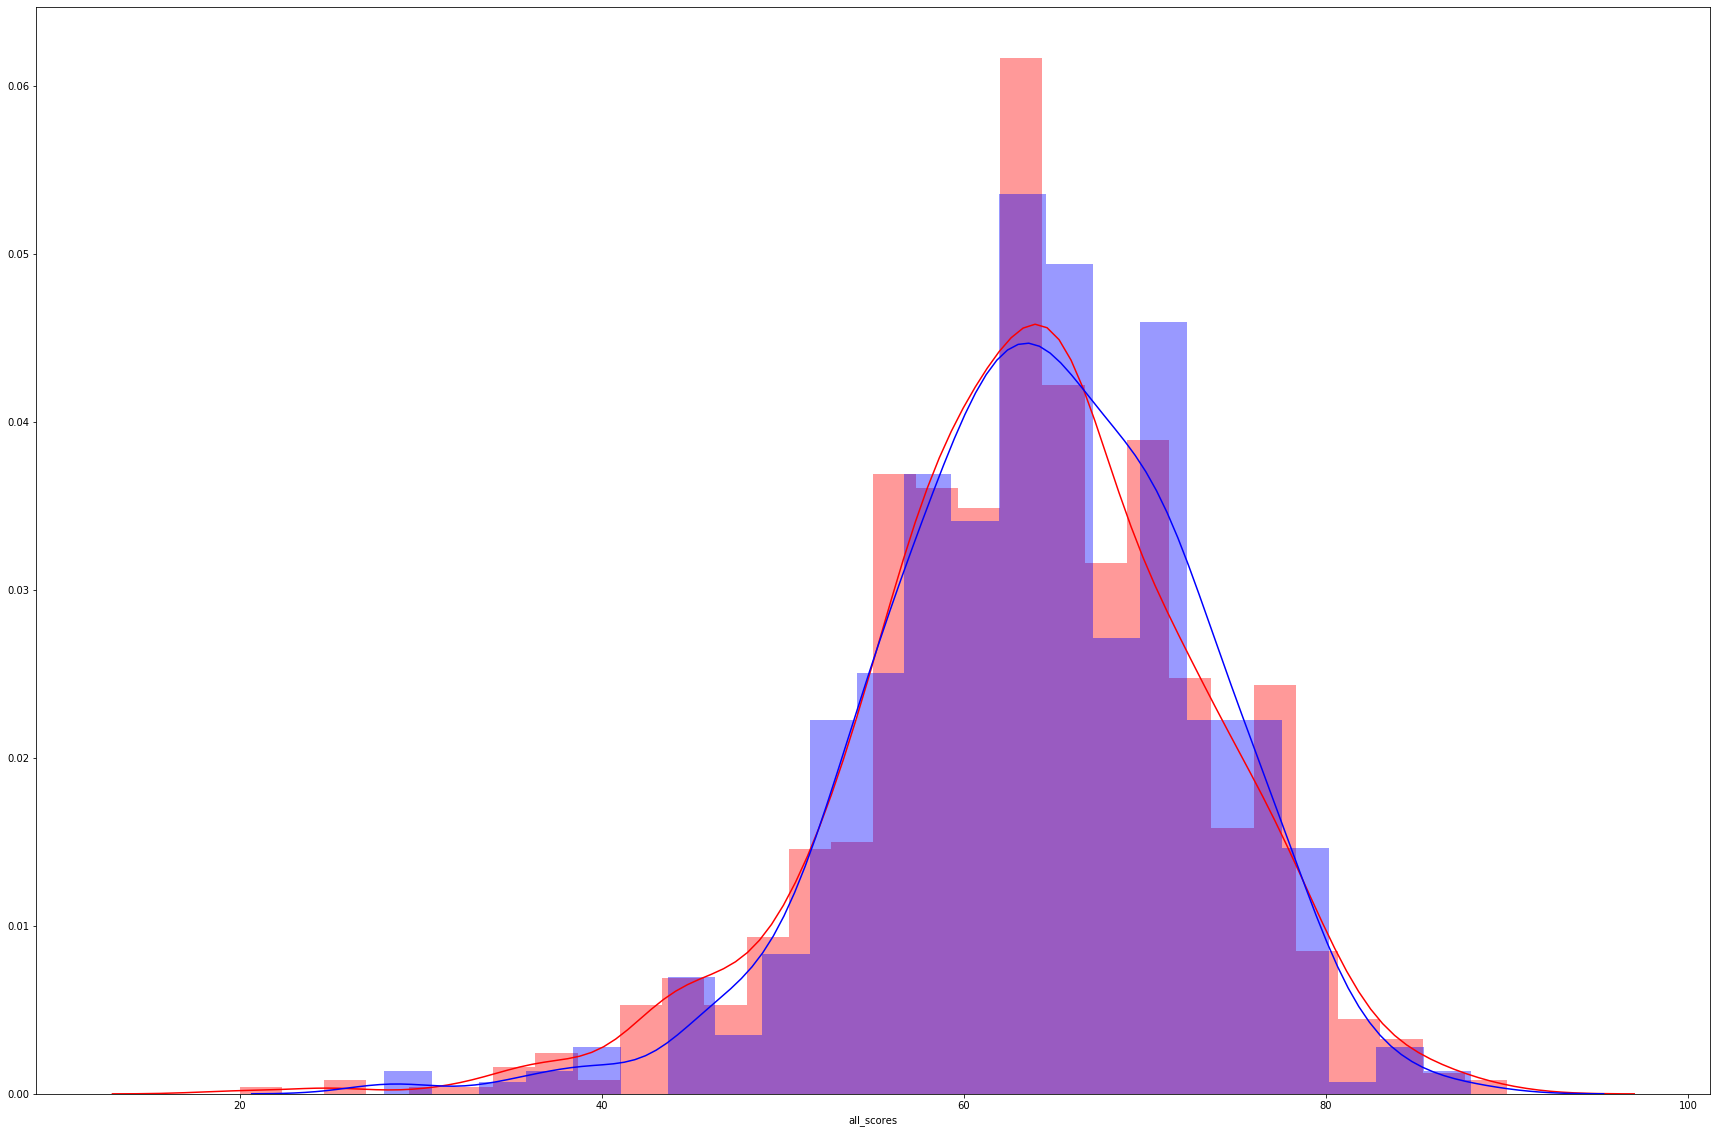

In [40]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.distplot(action_dataframe_2.all_scores, color ='red')
sns.distplot(romance_dataframe_2.all_scores , color = 'blue')

#### plottong the distribution for inflation corrected values

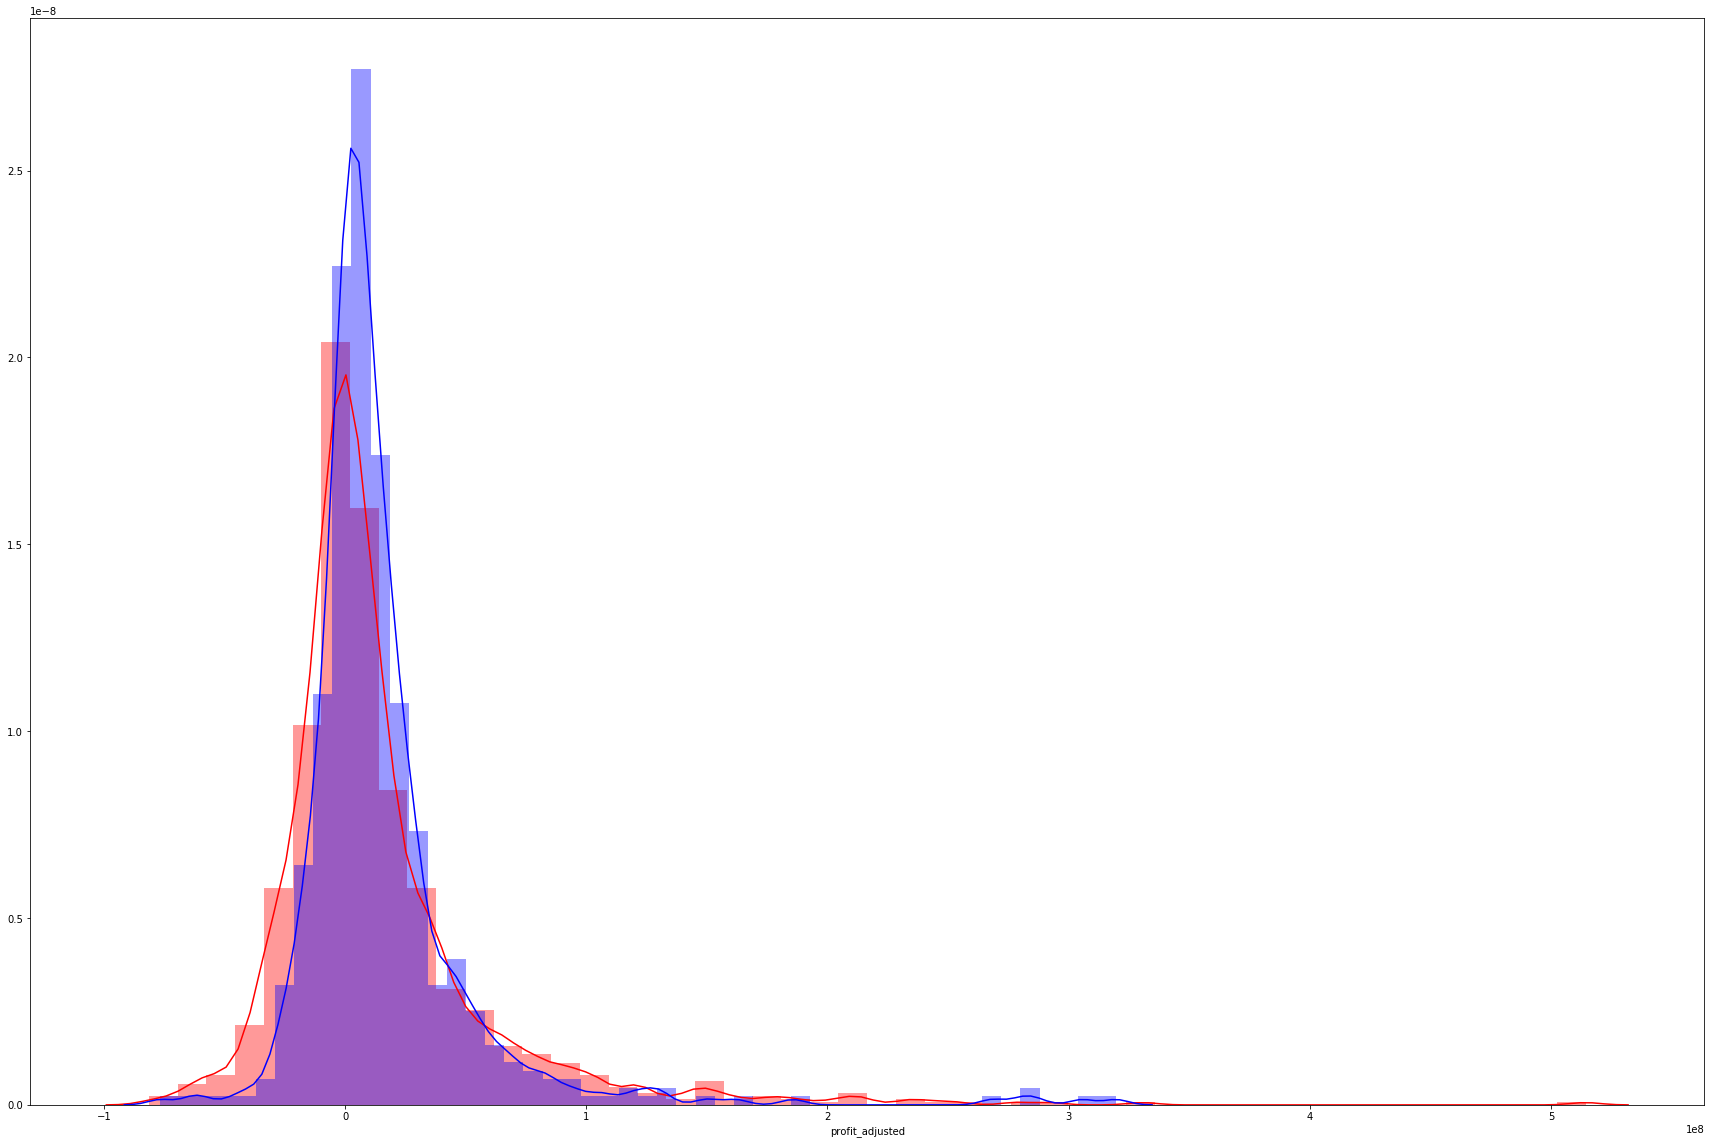

In [45]:
import seaborn as sns
plt.figure(figsize = (30,20))
sns.distplot(action_dataframe_2.profit_adjusted, color = 'red')
sns.distplot(romance_dataframe_2.profit_adjusted , color = 'blue')

#### FOR SOME REGRESSION ANALYSIS PLOT- LOOKING TO FIND IF THERE IS A CORRELATION BETWEEN BUDGET AND PROFIT

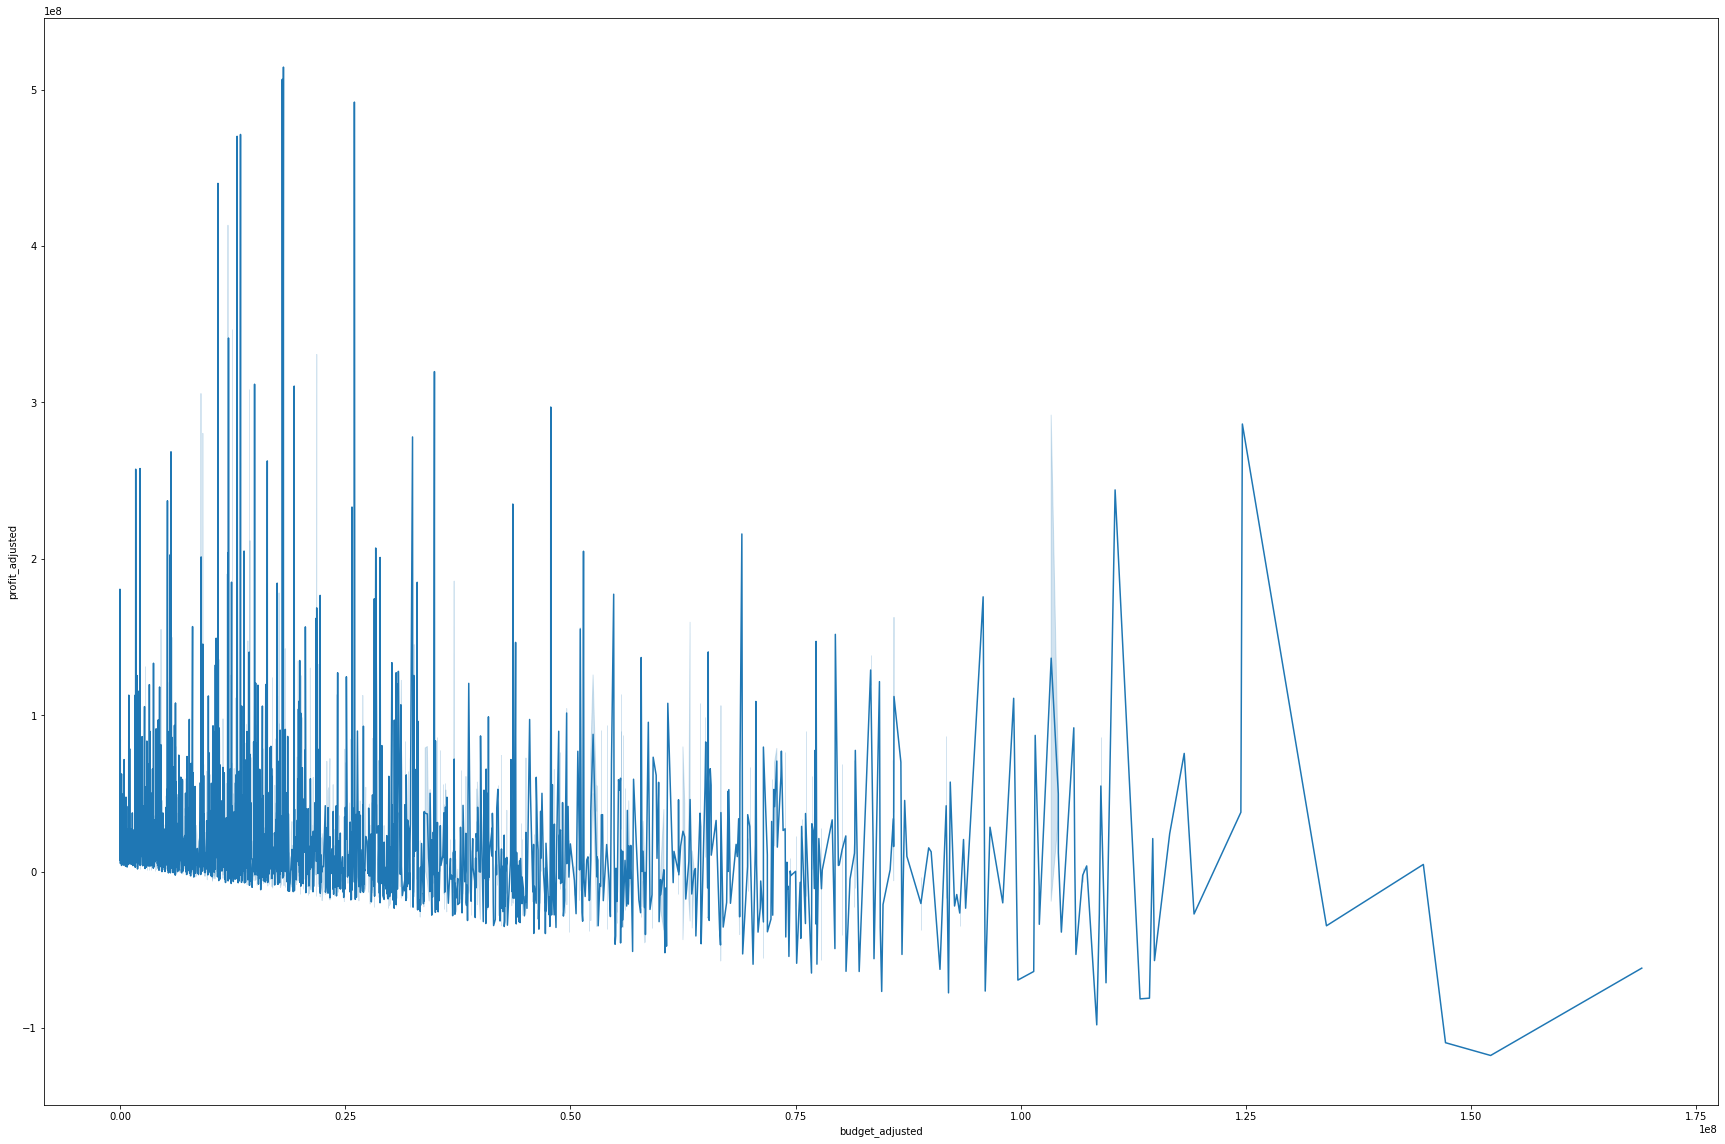

In [52]:
plt.figure(figsize = (30,20))
import matplotlib.pyplot as plt
ax = sns.lineplot(x="budget_adjusted", y="profit_adjusted", data=inflation_df)

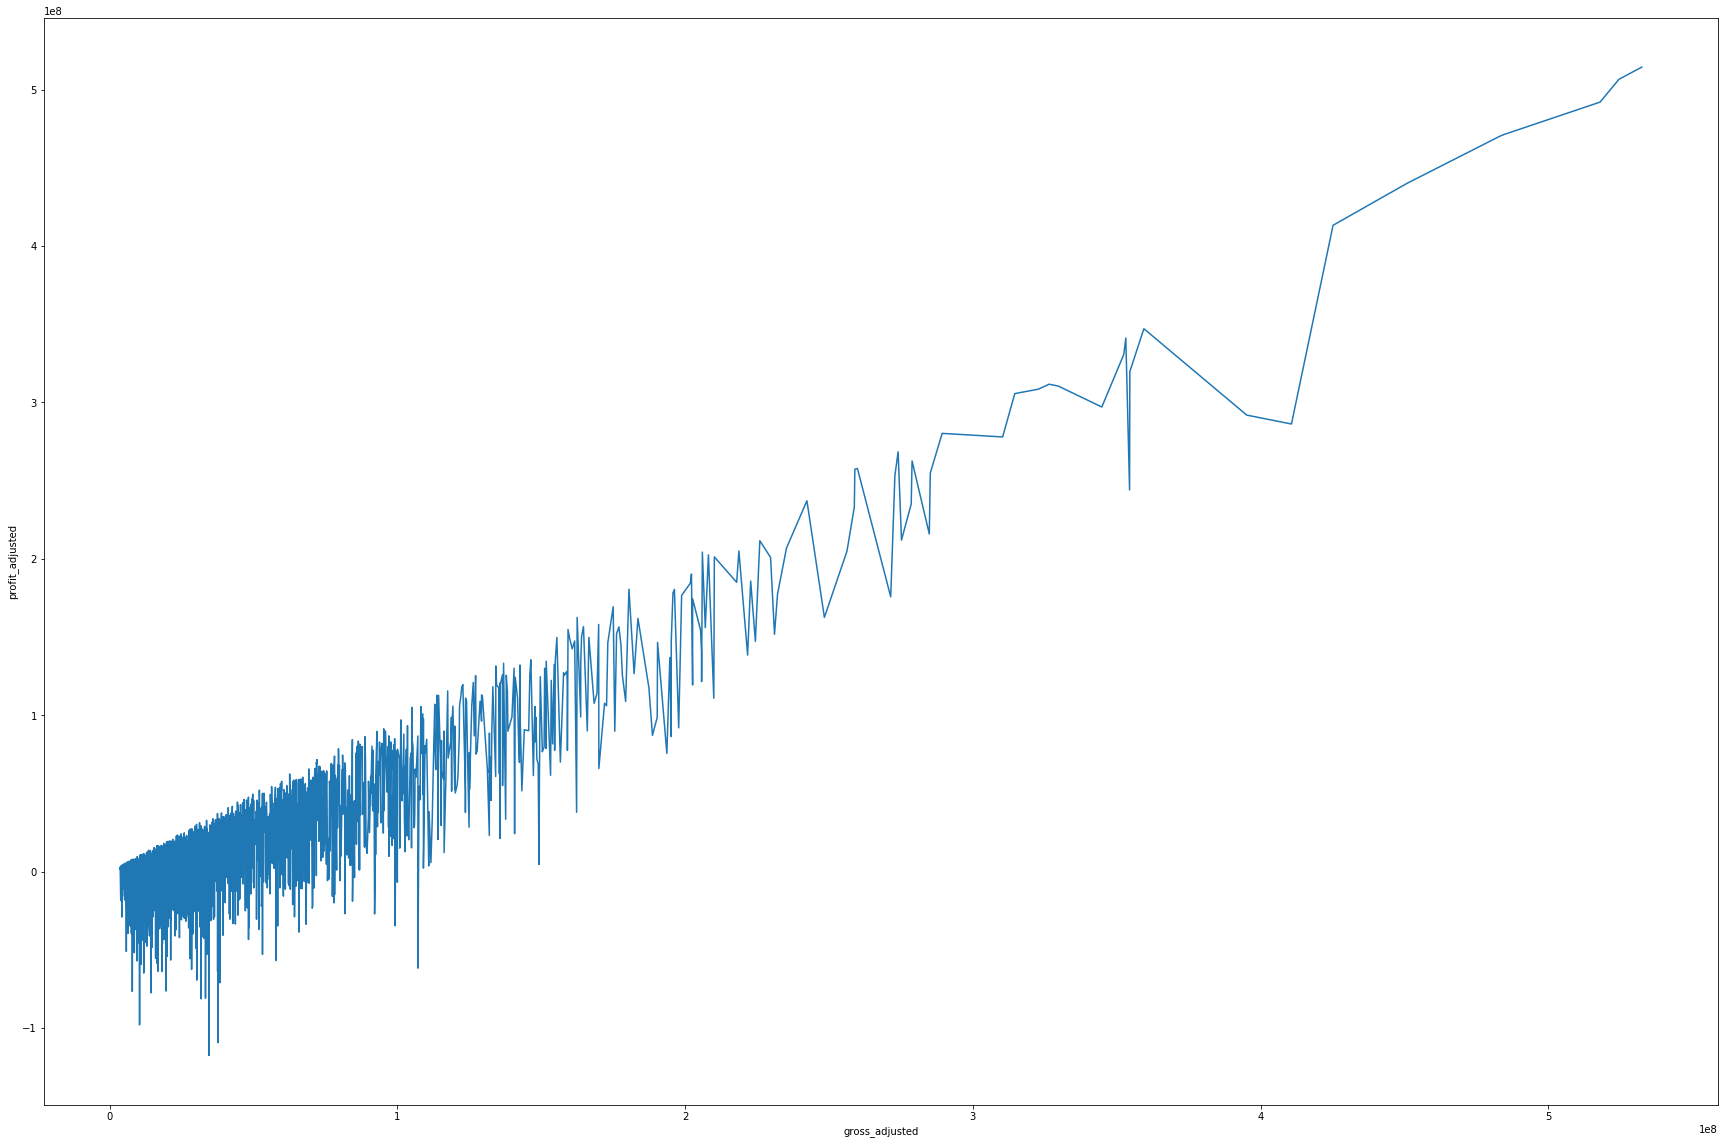

In [53]:
plt.figure(figsize = (30,20))
import matplotlib.pyplot as plt
ax = sns.lineplot(x="gross_adjusted", y="profit_adjusted", data=inflation_df)

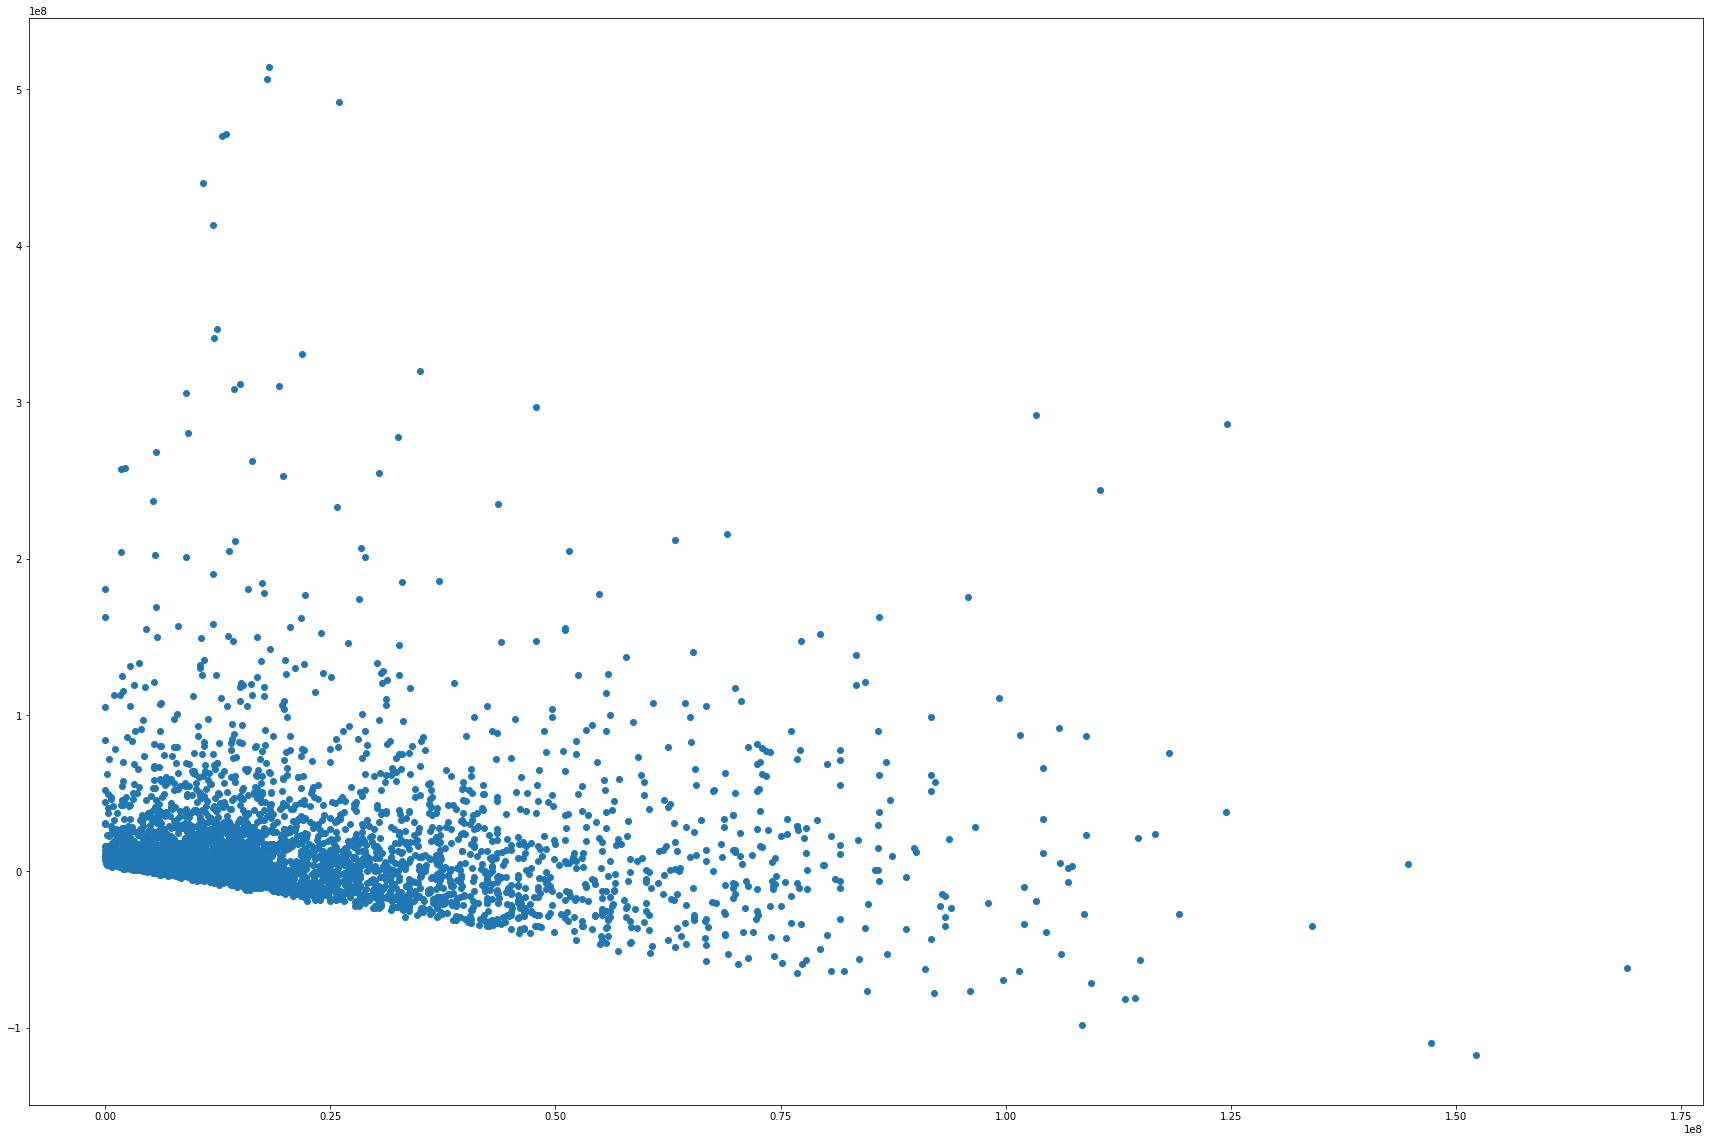

In [55]:
plt.figure(figsize = (30,20))
plt.scatter(x="budget_adjusted", y="profit_adjusted", data=inflation_df)

The plot denotes negative correlation between adjusted budget and adjusted profit

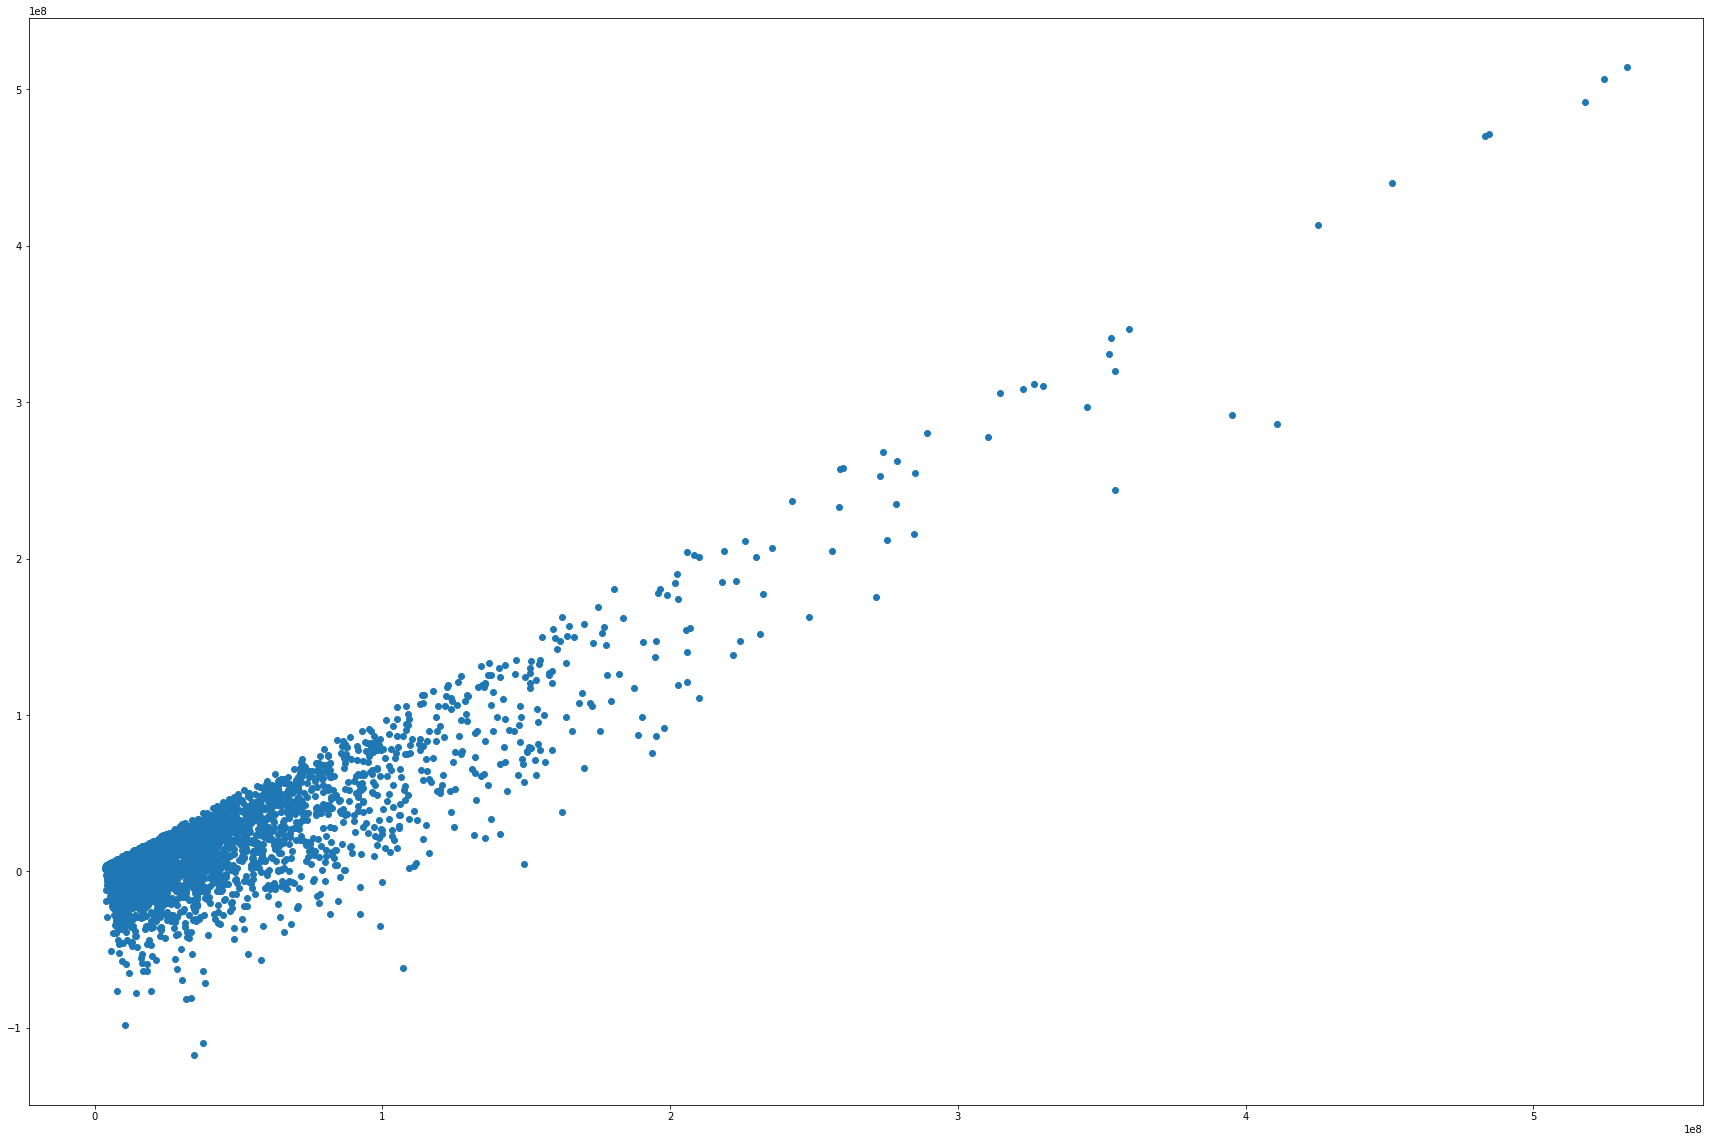

In [56]:
plt.figure(figsize = (30,20))
plt.scatter(x="gross_adjusted", y="profit_adjusted", data=inflation_df)

There is high positive correlation bewteen adjusted gross and adjusted profit

In [58]:
inflation_df.corr()

,Unnamed: 0,all_years,all_scores,all_meta,all_votes,all_gross,budget,profit,Index_all_years,budget_adjusted,gross_adjusted,profit_adjusted
Unnamed: 0,1.000000,-0.191295,-0.244433,-0.334875,-0.458499,-0.722837,-0.496399,-0.522924,-0.189464,-0.456358,-0.600933,-0.428085
all_years,-0.191295,1.000000,-0.149680,0.074712,0.156495,0.174884,0.363076,-0.061997,0.992067,0.116841,-0.276116,-0.350521
all_scores,-0.244433,-0.149680,1.000000,0.628796,0.525618,0.263349,0.034183,0.304308,-0.146137,0.057688,0.330918,0.326947
all_meta,-0.334875,0.074712,0.628796,1.000000,0.416700,0.286971,0.093351,0.288077,0.071000,0.067094,0.293312,0.282273
all_votes,-0.458499,0.156495,0.525618,0.416700,1.000000,0.597839,0.370179,0.463825,0.159126,0.328112,0.459024,0.336640
all_gross,-0.722837,0.174884,0.263349,0.286971,0.597839,1.000000,0.605382,0.786552,0.174736,0.557995,0.767432,0.558379
budget,-0.496399,0.363076,0.034183,0.093351,0.370179,0.605382,1.000000,-0.015345,0.367669,0.929189,0.292393,-0.124838
profit,-0.522924,-0.061997,0.304308,0.288077,0.463825,0.786552,-0.015345,1.000000,-0.065745,-0.019937,0.737223,0.798312
Index_all_years,-0.189464,0.992067,-0.146137,0.071000,0.159126,0.174736,0.367669,-0.065745,1.000000,0.122424,-0.269941,-0.346543
budget_adjusted,-0.456358,0.116841,0.057688,0.067094,0.328112,0.557995,0.929189,-0.019937,0.122424,1.000000,0.364087,-0.081476
